<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P1_JS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

## **Langkah 1**

In [ ]:
# ==========================================
# IMPORT LIBRARY
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# ==========================================
# LANGKAH 1: LOAD DATA
# ==========================================
# Pastikan file 'iris.csv' ada di direktori yang sama,
# atau ganti path sesuai lokasi file Anda.
try:
    data = pd.read_csv('iris.csv')
    print("Data berhasil di-load!")
    print(data.head())
except FileNotFoundError:
    print("File 'iris.csv' tidak ditemukan. Pastikan path file benar.")

Data berhasil di-load!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## **Langkah 2**

In [ ]:
# ==========================================
# LANGKAH 2: EKSPLORASI DATA
# ==========================================
print("\n--- Informasi Data ---")
data.info()

print("\n--- Statistik Deskriptif ---")
print(data.describe())

print("\n--- Jumlah Label Kelas ---")
print(data['species'].value_counts())


--- Informasi Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

--- Statistik Deskriptif ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   

## **Langkah 3**

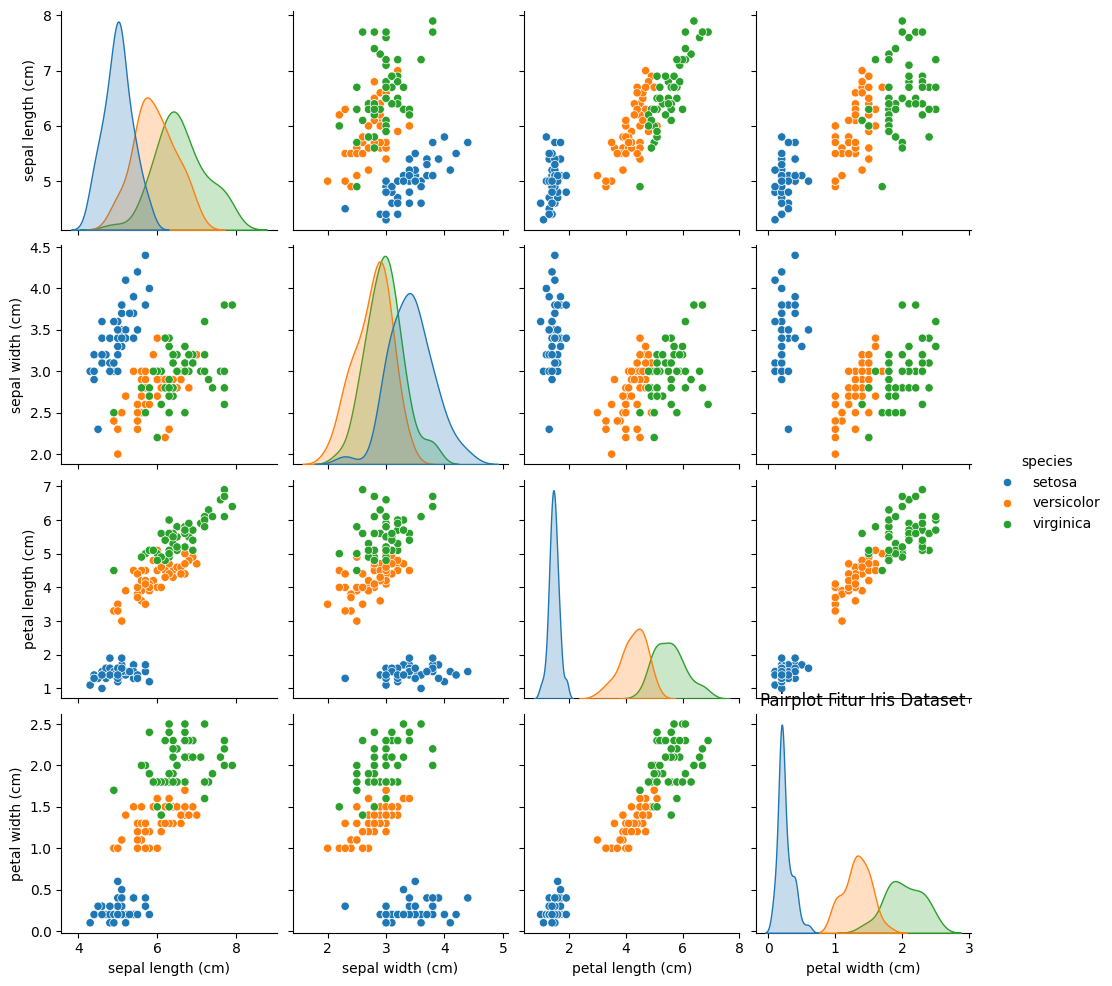

In [ ]:
# ==========================================
# LANGKAH 3: VISUALISASI DATA
# ==========================================
# Menggunakan pairplot untuk melihat distribusi dan korelasi
sns.pairplot(data, hue='species')
plt.title("Pairplot Fitur Iris Dataset")
plt.show()

## **Langkah 4**

In [ ]:
# ==========================================
# LANGKAH 4: PREPROCESSING
# ==========================================
# Memisahkan fitur (X) dan label (y)
X = data.iloc[:, :-1]   # Ambil semua kolom kecuali kolom terakhir
y = data.iloc[:, -1]    # Ambil kolom terakhir sebagai label

# Split data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi Data
# Penting untuk kNN karena algoritma ini berbasis jarak
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Langkah 5**

In [ ]:
# ==========================================
# LANGKAH 5: BUAT MODEL kNN
# ==========================================
# Menggunakan k=3 sesuai contoh
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## **Langkah 6**

In [ ]:
# ==========================================
# LANGKAH 6: EVALUASI MODEL
# ==========================================
y_pred = knn.predict(X_test)

print("\n--- Evaluasi Model (k=3) ---")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


--- Evaluasi Model (k=3) ---
Akurasi: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **Langkah 7**

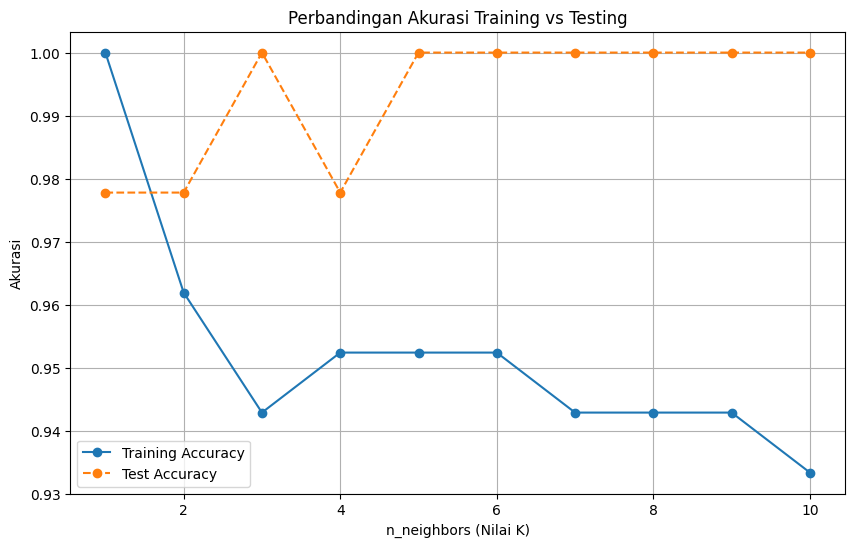

In [ ]:
# ==========================================
# LANGKAH 7: MENCARI NILAI K TERBAIK
# ==========================================
# Membandingkan performa data training dan testing untuk k=1 sampai k=10
train_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Membangun model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Mencatat akurasi training set
    train_accuracy.append(clf.score(X_train, y_train))
    # Mencatat akurasi test set
    test_accuracy.append(clf.score(X_test, y_test))

# Visualisasi Perbandingan Akurasi
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, train_accuracy, label="Training Accuracy", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy", marker='o', linestyle='--')
plt.ylabel("Akurasi")
plt.xlabel("n_neighbors (Nilai K)")
plt.title("Perbandingan Akurasi Training vs Testing")
plt.legend()
plt.grid(True)
plt.show()

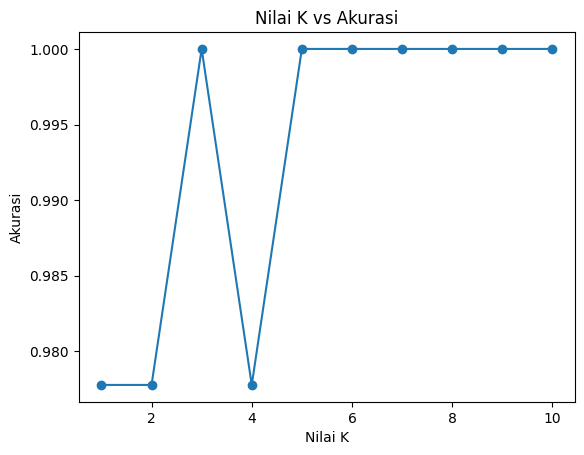

In [ ]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()